(01-grama-intro)=
# A Grammar of Model Analysis: Grama
```{index} single: grama ; py-grama
```

This chapter is about a **grammar of model analysis**. Just like English grammar provides us with rules about the language, a grammar of model analysis gives rules about how objects fit together; specifically, *models*, *data*, and the *verbs* that relate them. This ruleset is designed to facilitate model analysis under uncertainty.

These rules are implemented in the Python package `py-grama`. Using the `py-grama` package, you will be able to reproduce all of the case studies in this text. This means you can immediately take the code in this book and start applying it to your own studies! The `py-grama` package is free and open source software, hosted on GitHub at this URL: [https://github.com/zdelrosario/py_grama](https://github.com/zdelrosario/py_grama).

**Learning Objectives** In this chapter, you will learn:

- how to install the `py-grama` Python package,
- key concepts used in `py-grama`, and
- the basics of using `py-grama` to do model analysis under uncertainty, via a quick case study.

The best way to use this book is to follow the Quick Start instructions below to install `py-grama` and get familiar with the software.


## Quick Start with `py-grama`

This Quick Start guide will take you through installing `py-grama`, loading in a simple model, and analyzing the model with some exploratory analysis tools. The purpose of this Quick Start is not to solve a scientific problem, but rather to introduce the `py-grama` toolkit with a very simple model.


### Install
```{index} single: grama ; installation
```

Follow these instructions to install Python and the `py-grama` package.

#### Install Anaconda Python.
```{index} single: python ; anaconda distribution
```

[Anaconda](https://www.anaconda.com/distribution/)[^anacondaurl] is a way to install Python that includes many tools for scientific computing. We recommend starting from Anaconda to help take care of dependencies.

[^anacondaurl]: see `https://www.anaconda.com/distribution/`

As an alternative to installing Anaconda on your computer, you can use a cloud-based computation system such as Google's [Colab](https://colab.research.google.com/).

#### Use the Python package manager to install `py-grama`.

Open your [Anaconda prompt](https://docs.anaconda.com/anaconda/user-guide/getting-started/#cli-hello), type the following line into your prompt, and hit Return (Enter).

```
$ pip install py-grama
```

This will automatically download Grama and install its dependencies.

```{tip} **Prompt vs. Python.**
Throughout this book, we will use the symbol `$` to denote code you should run in your Anaconda prompt. This will be infrequent but important to notice!
```

#### Test your install.

Start a Python terminal (Open [Anaconda prompt](https://docs.anaconda.com/anaconda/user-guide/getting-started/#cli-hello), and use the command `python`) and run the code:

In [1]:
import grama as gr

If this runs without error, then you have successfully installed Grama!


In [2]:
from myst_nb import glue
gr.hide_traceback() # Shorten error traceback (for printed book)
gr.set_uqtheme()

### Jupyter Notebooks
```{index} single: python ; jupyter notebook
```

Above, you ran Python code in a terminal; this is like using Python as a calculator but does not allow you to save your work. Python code is sometimes saved in scripts; these are machine-readable files with the `.py` extension. Scripts are great for reusable code, but we prefer Jupyter Notebooks for organizing studies involving equations, figures, and documentation.

Jupyter Notebooks are great for writing scientific reports. In fact, the chapters of this text were written as Jupyter notebooks [^jb]!

[^jb]: We are thankful to the folks at the [Jupyter Book](https://jupyterbook.org/intro.html) project, whose work enabled this Python-powered textbook!

To start Jupyter, open your Anaconda prompt and run the command:

```
$ jupyter lab
```

This will open a page in your web browser with the JupyterLab interface. The JupyterLab documentation has more information; in particular, overview page [^overview-page] has a good introduction to using Jupyter. We highly recommend watching at least an introductory tutorial to learn how to use Jupyter Notebooks.

[^overview-page]: For one such tutorial, see [https://jupyterlab.readthedocs.io/en/stable/getting_started/overview.html](https://jupyterlab.readthedocs.io/en/stable/getting_started/overview.html)

```{admonition} **Exercise: Follow along!**
To get the most out of this book, we *highly* recommend you follow along with this Quick Start! Fire up a Jupyter Notebook and try the commands discussed next.
```


### Boilerplate code
```{index} single: grama ; boilerplate code
```

To set up `py-grama` in a Jupyter Notebook, you must run the following code:


In [3]:
### Boilerplate code for setting up py-grama
import grama as gr   # This imports the py-grama package
DF = gr.Intention()  # This sets up the DataFrame "pronoun"
# The following allows graphs to be shown "inline" in Jupyter
%matplotlib inline

This code loads `py-grama` and sets up some key infrastructure for the package.

```{tip} **Package prefix.**
Note that the call to `Intention()` uses the `gr` prefix we set with `import grama as gr`. This is how we access all functions and objects in `py-grama`.
```

Next, we'll go through a quick demo of `py-grama`.


(02-demo-model)=
### A demo model

Run the following code to load a built-in `py-grama` model and print a summary:


In [4]:
# Import a test model
from grama.models import make_test
# Initialize the model
md_test = make_test()
# Print a model summary
md_test

/Users/zach/Git/py_grama/grama/marginals.py:338: RuntimeWarning: divide by zero encountered in double_scalars


model: (no name)

  inputs:
    var_det:
      x2: [-1, 1]

    var_rand:
      x0: (+0) uniform, {'mean': '0.000e+00', 's.d.': '5.800e-01', 'COV': inf, 'skew.': 0.0, 'kurt.': 1.8}
      x1: (+0) uniform, {'mean': '0.000e+00', 's.d.': '5.800e-01', 'COV': inf, 'skew.': 0.0, 'kurt.': 1.8}

    copula:
      Independence copula

  functions:
      f0: ['x0', 'x1', 'x2'] -> ['y0']

We'll discuss these elements of a model more in later sections. For now, note that we have three inputs `['x0', 'x1', 'x2']` that map to one output `['y0']`. 

```{warning} **Code warnings.**
Note that this code produces a *warning*, specifically a `RuntimeWarning`. In this case, the warning is due to a `divide by zero`, which is in turn due to a computation of the coefficient of variation (COV). Note that the COV values are `inf` in this model summary. Because the COV is computed as the standard deviation (s.d.) divided by the mean---and the mean is zero in this case---the COV is infinite.

Warnings are common when writing and running code. Sometimes these warnings provide useful information for interpreting results. Other times, warnings point to important issues that we should resolve.
```

We can get a sense for how the model behaves by sweeping over different values of the inputs one-at-a-time and visualizing the output values. One way to produce this kind of visual is to construct a *sinew plot*, discussed further in {numref}`Section %s <02s-ema-sinews>`. The following code produces a sinew plot with the demo model.

In [5]:
p = (
    # Use the demo model
    md_test
    # Generate data
    >> gr.ev_sinews(df_det="swp")
    # Visualize the data
    >> gr.pt_auto()
)

Calling plot_sinew_outputs....


To show a figure, we simply `print()` the plotted object:

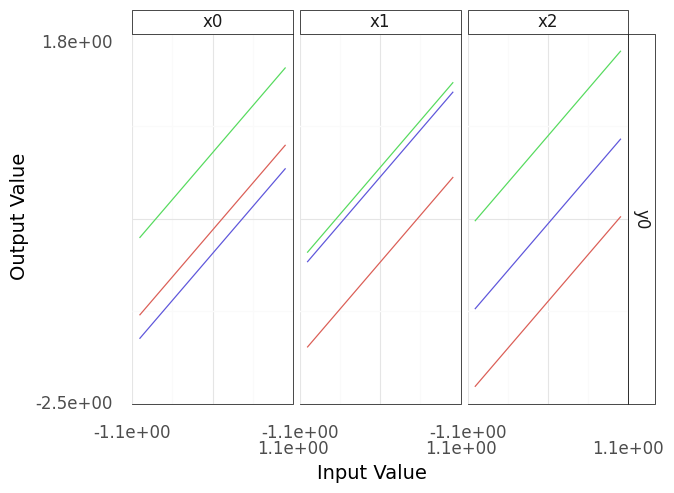

In [6]:
print(p)

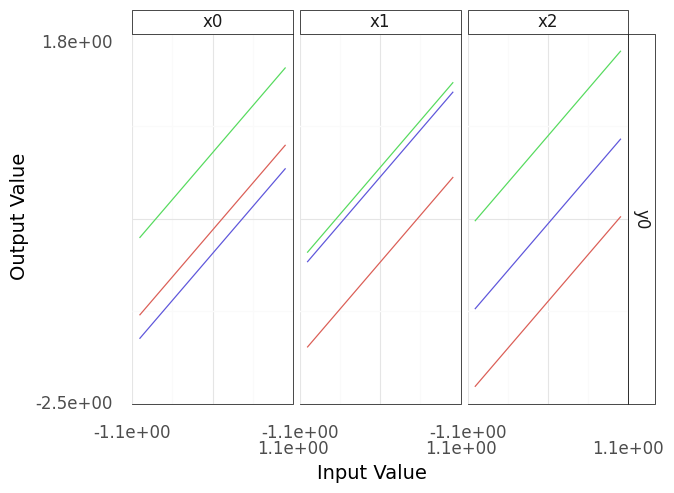

In [7]:
%%capture --no-display
print(p)

```{glue:figure} grama-intro-sinew
:name: fig-grama-intro-sinew

Sinew plot generated from example model.
```

Note that the resulting plot (**{numref}`Figure %s <fig-grama-intro-sinew>`**) has three columns and one row; these correspond to the three inputs (columns and horizontal axes) and one output (rows and vertical axes). Each column of this plot shows a "sweep" over its inputs: a single input is varied while holding the other inputs constant, and the resulting values for the output are recorded. For instance, in the panel under `x0`, the input `x0` is varied while `x1` and `x2` are held constant. As model behavior can change depending on the held-constant inputs, the process repeats for a variety of starting conditions, resulting in multiple lines in each panel.

```{tip} **All linear?**
Interpreting the plot **{numref}`Figure %s <fig-grama-intro-sinew>`**, the output `y0` seems to be linear in all of its inputs: No matter where we start, moving along one of the inputs results in a linear trend for the output. Maybe we got lucky? With more sweeps, would we see a different result?
```

### Overriding the defaults
```{index} single: python ; keyword arguments
```

The `py-grama` package is designed to provide sensible defaults to get you started with each function, but you can override these defaults when necessary. For instance, the following code plots more sweeps by specifying the keyword argument `n_sweeps=4` (**{numref}`Figure %s <fig-grama-sinew-param>`**).


In [8]:
p = (
    md_test
    # Generate data
    >> gr.ev_sinews(
        df_det="swp",
        # Generate more sweeps
        n_sweeps=4,
    )
    >> gr.pt_auto()
)

Calling plot_sinew_outputs....


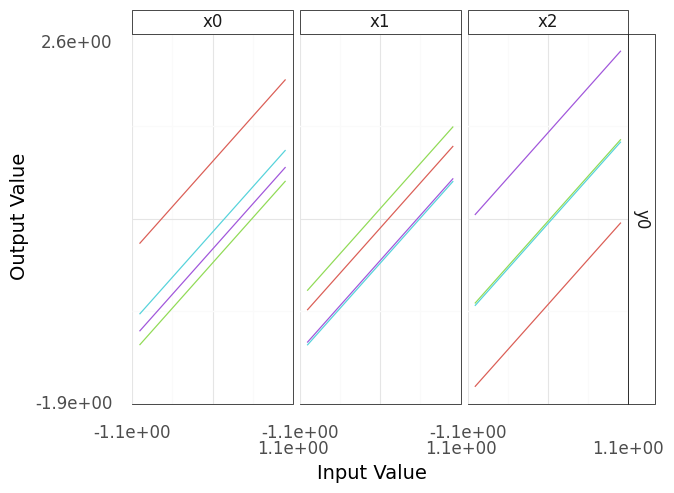

In [9]:
%%capture --no-display
print(p)

```{glue:figure} grama-sinew-param
:name: fig-grama-sinew-param

A sinew plot generated from the demo model; note the increased number of sweeps (4).
```

Note that more sweeps (larger `n_sweeps`) will tend to require more compute time [^n_sweeps] (**{numref}`Figure %s <fig-grama-sinew-param>`**). This might be easy to afford if your model is simple, but can be quite expensive as your model grows more complicated.

[^n_sweeps]: Formally, the computational complexity is linear in `n_sweeps`.

```{warning} **Not proven linear.**
Interpreting the plot in **{numref}`Figure %s <fig-grama-sinew-param>`**, you can see that even with more sweeps the output `y0` still seems to be linear in all of its inputs. This doesn't prove that `y0` is linear in all its inputs, but the evidence seems convincing for now.
```

### Getting help
```{index} single: python ; help()
```

No programmer memorizes *everything* in a software package! Competent programmers regularly consult documentation to remind themselves how to use a function, or to learn about a new function.

Reading a function's documentation can be overwhelming at first, but with practice you can quickly find a lot of useful information. In Python, you can use the `help()` command to get more information on a function:


In [10]:
help(gr.eval_sinews)

Help on curry in module grama.eval_random:

eval_sinews(model='__no__default__', n_density=10, n_sweeps=3, seed=None, df_det=None, varname='sweep_var', indname='sweep_ind', append=True, skip=False)
    Sweep study
    
    Perform coordinate sweeps over each model random variable ("sinew" design). Use random starting points drawn from the joint density. Optionally sweep the deterministic variables.
    
    For more expensive models, it can be helpful to tune n_density and n_sweeps to achieve a reasonable runtime.
    
    Use gr.plot_auto() to construct a quick visualization of the output dataframe. Use `skip` version to visualize the design, and non-skipped version to visualize the results.
    
    Args:
        model (gr.Model): Model to evaluate
        n_density (numeric): Number of points along each sweep
        n_sweeps (numeric): Number of sweeps per-random variable
        seed (int): Random seed to use
        df_det (DataFrame): Deterministic levels for evaluation;
       

Let's break down the information just presented:

- The line with `eval_sinews(...)` is the *function signature*; this shows the function with all of its possible arguments.
- The paragraphs that follow the signature describe the function in plain language.
- The lines under `Args` detail the arguments to the function. The lines are of the form `name (type): Details`, where
  - `name` is the name of the argument,
  - `type` is the expected datatype of the argument, and
  - `Details` follow in plain text. If an argument only takes particular values, the `Details` should tell you about this.
- The line under `Returns` details the returned object (if any), including its datatype.
- Function documentation often includes `Examples`; look at this section for some real-code examples of the function's use. This is particularly useful, as you can see what other objects and functions this tool is used with.

```{tip} **Accessing documentation in Jupyter.**
Note that in Jupyter, you can quickly reference the documentation for a function by placing your cursor over a function you'd like to reference, and pressing the keys `Shift + Tab`. Try this in your own Jupyter Notebook.
```


## Grama Concepts

Now that we've seen how `py-grama` works, let's look closer at the concepts behind `py-grama`. The `py-grama` package was designed around a few simple ideas: two primary kinds of objects (data and models) and four kinds of verbs.


### Objects: Data and models
```{index} single: pandas ; DataFrame
```

#### Data (`df`).

Data in `py-grama` is organized into [Pandas](https://pandas.pydata.org/) **DataFrames** {cite}`reback2020pandas`. A DataFrame is a digital table, with named columns that organize observations on variables. When using `py-grama`, the convention is to name your DataFrames with the `df_` prefix followed by a descriptive name, for instance `df_train` for a set of training data.

The code we saw under {numref}`Chapter %s <02-demo-model>` generated a DataFrame, that was then visualized using the `gr.pt_auto()` tool. If we disable the plotting line with a comment as follows, we can inspect the data:


In [11]:
df_results = (
    md_test
    # Generate data
    >> gr.ev_sinews(df_det="swp")
    # The following line is commented;
    # the data will not be plotted
#     >> gr.pt_auto()
)
df_results
    

,x1,x0,x2,sweep_var,sweep_ind,y0
0,-0.951066,-1.000000,-0.834548,x0,0,-2.785613
1,-0.951066,-0.777778,-0.834548,x0,0,-2.563391
2,-0.951066,-0.555556,-0.834548,x0,0,-2.341169
3,-0.951066,-0.333333,-0.834548,x0,0,-2.118947
4,-0.951066,-0.111111,-0.834548,x0,0,-1.896724
...,...,...,...,...,...,...
85,-0.733800,-0.472779,0.111111,x2,2,-1.095467
86,-0.733800,-0.472779,0.333333,x2,2,-0.873245
87,-0.733800,-0.472779,0.555556,x2,2,-0.651023
88,-0.733800,-0.472779,0.777778,x2,2,-0.428800


Note that the DataFrame `df_results` contains both numeric columns (such as `df_results.x1`) and string columns (such as `df_results.sweep_var`). We can also see some basic-but-useful facts, such as the size (90 rows x 6 columns).

Without some processing, data by itself cannot generate insights. We will see a variety of *transformation* verbs we can use in `py-grama` to work with data, and we will use data to inform and fit models.

The data we work with can come from a physical experiment (loaded from disk) or from a simulation (generated by a model). Either way, it will be packaged in a Pandas DataFrame. This ensures we can use consistent tools to work with data, regardless of their origin.


```{index} single: grama ; model definition
```

*Models (`md`)*

**Models** in `py-grama` are represented by a special `gr.Model` Python class. A model is essentially a capsule containing functions that map inputs to outputs and information about the inputs. We saw some of this information summarized when we printed `md_test` previously, and again here:


In [12]:
md_test

/Users/zach/Git/py_grama/grama/marginals.py:338: RuntimeWarning: divide by zero encountered in double_scalars


model: (no name)

  inputs:
    var_det:
      x2: [-1, 1]

    var_rand:
      x0: (+0) uniform, {'mean': '0.000e+00', 's.d.': '5.800e-01', 'COV': inf, 'skew.': 0.0, 'kurt.': 1.8}
      x1: (+0) uniform, {'mean': '0.000e+00', 's.d.': '5.800e-01', 'COV': inf, 'skew.': 0.0, 'kurt.': 1.8}

    copula:
      Independence copula

  functions:
      f0: ['x0', 'x1', 'x2'] -> ['y0']

Reading these lines, we can see that the key information about the model is summarized as text:

- The `inputs` organize the model inputs into two categories:
  - `var_det` are the *deterministic* variables; these are assumed to be perfectly known, and must be set to run the model. Deterministic variables are reported with their bounds.
  - `var_rand` are the *random* variables; these are assumed to be fundamentally unknowable, and can be sampled according to their distribution. Random variables are reported with their distribution type and parameters.
- The `copula` describes the relationship between random variables. In the example given, the random variables are assumed to be mutually independent.
- The `functions` list all of the mappings from inputs to outputs.
  - The previous example has just one function `f0`, which maps all of its inputs to the single output `y0`.
  
In `py-grama`, models are used to represent scenarios with quantified uncertainties. We can use models to run simulations (generate simulated data), to propagate uncertainty, or even as a template to fit a model to data.


### Verbs: Four fundamental verbs
```{index} single: grama ; verbs
```

The `py-grama` package focuses on data and model objects, and provides four kinds of **verbs** that inter-relate the two object types. The relationship between these objects and verbs constitutes the *grammar* of this grammar of model analysis.

In short, the four verbs relate data and models according to **{numref}`Figure %s <fig-verb-classes>`**.

:::{figure-md} fig-verb-classes
<img src="../images/verb-classes-bw.png" alt="Verb classes" width="75%">

The `py-grama` verbs, as they relate to data and models.
:::

In greater detail, the four verbs are:

* To **transform** (`tf`) is to modify one DataFrame into another DataFrame. Some examples include making simple calculations (like converting from Fahrenheit to Celsius), reshaping a dataset, converting from one datatype to another, and so on.
* To **evaluate** (`ev`) is to use a model to generate a DataFrame. Evaluation routines are used to run a variety of simulations, such as a simple planned run (`gr.ev_df()`), a Monte Carlo simulation (`gr.ev_sample()`), or a more advanced reliability-assessment technique (e.g. `gr.ev_form_pma()`).
* To **fit** (`ft`) is to use a training DataFrame to generate a model. We could start with a user-defined model and fit its free parameters (`gr.ft_nls()`), or use a purely empirical approach to modeling the data (e.g. `gr.ft_gp()`).
* To **compose** (`cp`) is to modify an existing model and return a new model. Composition routines are generally used in the model-building phase of a study, though we can also use them to make small adjustments to a model.

Like any language, there are also some exceptional verbs:

* Plotting routines (`pt`) are used to visualize data. You are of course free to plot your data however you like, but know that the magic `gr.pt_auto()` routine is available to provide a quick visualization for many of the outputs of `ev` verbs.

**{numref}`Table %s <tab-verbs>`** summarizes the verbs in terms of their prefixes and input-output datatypes.

```{table} Table of verbs and prefixes.
---
name: tab-verbs
---
| **Verb** | **Short** | **In** | **Out**  |
|---------|-------|------|------|
| `tran_` | `tf_` | `df` | `df` |
| `eval_` | `ev_` | `md` | `df` |
| `fit_`  | `ft_` | `df` | `md` |
| `comp_` | `cp_` | `md` | `md` |
| `plot_` | `pt_` | `df` |  --  |
```

Complex activities such as verification and validation ({numref}`Chapter %s <02-vnv>`) can be understood as working with both data and models. The `py-grama` package provides a consistent syntax for implementing complex activities in terms of fundamental verbs. For instance, validating a model requires that we compare model outputs with experimentally measured values. To do so, we must first fit (`fit_`) the model to match the experimental settings, then evaluate (`eval_`) the model using validation-grade data to compare against the experimental results.

```{tip} **Recognizing a new verb.**
The verb prefixes `tran_` (`tf_`), `eval_` (`ev_`), `fit_` (`ft_`), and `comp_` (`cp_`) are *signifiers* that help you recognize something about a verb just by looking at it. Remember that the prefix will tell you the type of the verb's first input, and the type of its return value.
```

(02-grama-functional)=
### Functional programming

The `py-grama` package also provides some special syntax for **functional programming**-style computational pipelines. One of the advantages of this style of programming is that we can eliminate intermediate variable names. For instance, consider the following *imperative*-style code:


In [13]:
## Build the model
# Initialize an empty model
md_temporary = gr.Model("Temporary model")
# Add a function to the model
md_temporary = gr.comp_function(
    md_temporary,
    # Use an inline (lambda) function
    fun=lambda x0, x1: x0 * x1,
    var=2,
    out=1
)
# Add some bounds for the inputs
md_temporary = gr.comp_bounds(
    md_temporary,
    x0=(0, 1),
    x1=(0, 1),
)

## Generate results
df_temporary = gr.eval_sinews(
    md_temporary,
    df_det="swp",
)

## Visualize (Note: Not executed for space)
p = gr.plot_auto(df_temporary)

Calling plot_sinew_outputs....


Note to write this code, we had to assign the model (`md_temporary`) and output data (`df_temporary`) to variables, in order to write the code. This is somewhat, as we are only setting up the model and data to generate a single plot.

```{tip} **Inline (lambda) functions.**
The `lambda` keyword just used might be unfamiliar. This is a way to define an *inline function* in Python. Effectively, the `lambda` keyword is a compact way to define a function. For a `lambda` function, the symbols before the colon are function inputs, while the expression following the colon defines the return value.
```

Now compare with the following *functional-style* code:


In [14]:
p = (
    ## Build the model
    # Initialize an empty model
    gr.Model("Temporary model")
    # Add a function
    >> gr.cp_function(
        fun=lambda x0, x1: x0 * x1,
        var=2,
        out=1,
    )
    # Add some bounds
    >> gr.cp_bounds(x0=(0, 1), x1=(0, 1))
    ## Evaluate the model
    # Generate data
    >> gr.ev_sinews(df_det="swp")
    # Visualize the data
    >> gr.pt_auto()
)

Calling plot_sinew_outputs....


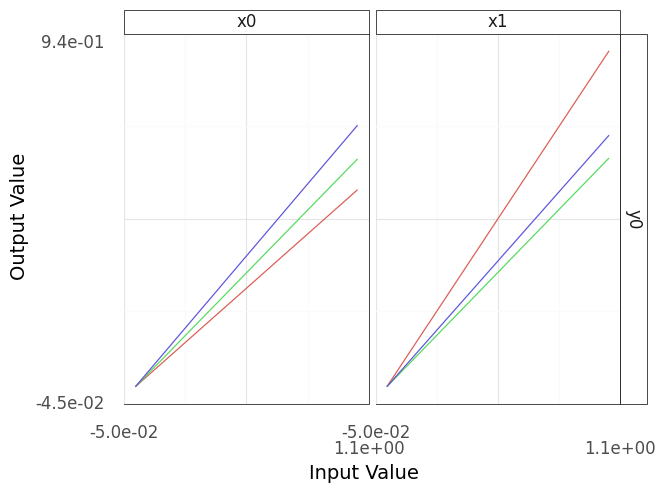

In [15]:
%%capture --no-display
print(p)

```{glue:figure} grama-vis-functional
:name: fig-grama-vis-functional

Sinew plot generated using functional programming-style code.
```

Note that both the imperative and functional versions of the code will produce identical figures (e.g., **{numref}`Figure %s <fig-grama-vis-functional>`**). The functional-style code is more compact and does not require us to set intermediate variable names. However, it can be confusing to read at first.

One idea that helps make functional-style code more readable is to think of the *pipe operator* `>>` as the phrase "and then." This makes the following code:

```python
(
    gr.Model(...)
    >> gr.cp_function(...)
    >> gr.cp_bounds(...)
    >> gr.ev_sinews(...)
)
```

read more like natural language:

```
(
    Create a model
    and then compose with a function
    and then compose with bounds
    and then evaluate sinews
)
```

```{tip} **Short prefixes for functional-style code.**
Note also that the short two-letter prefixes (e.g. `ev_`) are used for functional-style code, as opposed to the long forms of the prefix (e.g. `eval_`). If you find that your code throws errors, make sure you're using the correct form of the prefix.
```

### More on `py-grama`

This concludes the brief explanation of `py-grama`. For more information, you can read the official documentation, hosted at [https://py-grama.readthedocs.io/en/latest/](https://py-grama.readthedocs.io/en/latest/). {numref}`Chapter %s <02-grama-brief>` illustrates how `py-grama` can be used for engineering applications.


(02-grama-brief)=
## A Brief Case Study: Assessing Structural Safety

We wrap up this chapter with an example of using `py-grama` to analyze the response of a metal plate to applied forces ("loads"). Specifically, we are interested in assessing the structural integrity of the plate when it is subject to compressive (inward) loads. Plates are common in many kinds of structures; for instance, the skin of an airplane wing is designed to take some of the bending loads due to lift generation. If one of these skin panels *buckles*, it will crumple and potentially lead to unsafe deformation of the wing. 

**{numref}`Figure %s <fig-grama-plate-schematic>`** depicts a thin plate subject to a compressive load. Using simple physical arguments and assuming fixed geometric and material properties, we can predict the maximum load $L$ the plate can carry.

<!-- ![](../images/plate-schematic.png) -->

:::{figure-md} fig-grama-plate-schematic
<img src="../images/plate-schematic.png" alt="Schematic depiction of the flat plate, subject to a buckling load" width="35%">

A schematic depiction of a flat plate subject to a buckling load.
:::

However, variability in manufacturing means no two plates will perform exactly the same. While it would be possible in principle to inspect every plate to determine its buckling strength, it would not be feasible to carry out this testing on every manufactured plate. This lack of information means there is uncertainty associated with every plate. We will analyze the safety of plates under buckling conditions by performing a reliability analysis---assessing the probability of failure.

All scientific and engineering projects should have some sort of **goal**; the case studies in this book are no different.

```{tip} **Goals for this case study.**
In studying these plates, our **goal** is to determine an appropriate thickness of plate that will support the desired compressive load of 1 ksi with a low chance of buckling. For this study, we seek a failure rate of less than 1 in a 100 (**{numref}`Figure %s <fig-grama-schematic-rare>`**).
```

In [16]:
# Hidden input
# Make "1 in 100" schematic
p = (
    gr.df_grid(x=range(20), y=range(5))
    >> gr.tf_mutate(
        failed=gr.if_else(
            (DF.x == 3) & (DF.y == 1),
            True,
            False,
        )
    )
    
    >> gr.ggplot(gr.aes("x", "y"))
    + gr.geom_point(gr.aes(shape="failed", size="failed", color="failed"))
    + gr.scale_shape_manual(values={True: "x", False: "."})
    + gr.scale_size_manual(values={True: 8, False: 5})
    + gr.scale_color_manual(values={True: "red", False: "black"})
    + gr.theme_void()
    + gr.theme(figure_size=(5, 3), plot_background=gr.element_rect(fill="white"))
    + gr.guides(shape=None, size=None, color=None)
    + gr.labs(title="One Failure in 100")
)

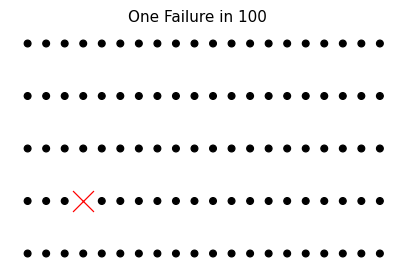

In [17]:
%%capture --no-display
print(p)

```{glue:figure} grama-schematic-rare
:name: fig-grama-schematic-rare

A visual depiction of 1 in 100. While we can't guarantee *which* outcome will fail, we can be confident that only around 1 in 100 of these built objects will fail. This is a desirable outcome in manufacturing: to minimize the *probability of failure*.
```

First, we set up the case study by importing some data on aluminum plate material properties and loading a package to visualize the data:

In [18]:
from grama.data import df_stang # Dataset for modeling

```{warning} **Representative data.**
In order for data to be appropriate for our study, they must be **representative** of the manufacturing process we will use to produce the plates. (They can't just be any old data!) In this case study, we will assume the data come from our desired manufacturing process.
```

Let's inspect the data we just loaded.


In [19]:
df_stang.head(6)

,thick,alloy,E,mu,ang
0,0.022,al_24st,10600,0.321,0
1,0.022,al_24st,10600,0.323,0
2,0.032,al_24st,10400,0.329,0
3,0.032,al_24st,10300,0.319,0
4,0.064,al_24st,10500,0.323,0
5,0.064,al_24st,10700,0.328,0


These are observations on the elasticity `E` (ksi) and Poisson's ratio `mu` (-) of a rolled aluminum alloy, with multiple specimens prepared and tested {cite}`stang1946`. Elasticity is a measure of the "stiffness" of a material [^stretch]; the higher the `E` value, the more force it takes to stretch the part. The Poisson's ratio is sometimes called the volume contraction ratio; for example, when stretching a rubber band, the band will tend to get thinner in the middle. The Poisson's ratio of a material determines how much thinner a part will tend to get when stretched. These two properties affect the buckling strength of a plate; we'll see this when we study the buckling equation in {numref}`Chapter %s <02-grama-building>`.

However, before we study buckling, we will use these data to build a model for the *uncertainty* in the material properties.

[^stretch]: More formally, elasticity is a material property while stiffness is a property of a structure. Elasticity is assumed to vary only by the choice of material, while stiffness is a function of both the material elastic properties and the geometry of the structure.

(02-grama-building)=
### Building the model

When building a model from data, we should first inspect the data to make sure they are trustworthy. This process will help us check our assumptions and data quality.

```{tip} **Properties are thickness-independent?**
Material properties such as elasticity and the Poisson ratio are generally thought to be thickness-independent. If this is the case, then we don't need to worry too much about relating the material properties to the chosen plate thickness, which will greatly simplify modeling. However, we should check this assumption using our data.
```

The plot in **{numref}`Figure %s <fig-grama-vis-alloys>`** shows the Poisson's ratio against elasticity, with the thickness of each specimen denoted by the shapes of the points. Note that this plot is made using `gr.ggplot()`, which is discussed in {numref}`Chapter %s <02-data-ggplot>`.


In [20]:
# Hidden input
p = (
    df_stang
    >> gr.tf_mutate(thick=gr.as_str(DF.thick))
    >> gr.ggplot(gr.aes("E", "mu", color="thick"))
    + gr.geom_point(size=2)
    + gr.scale_color_brewer(name="Thickness (in)", type="qual", palette=2)
    + gr.theme_uqbook()
    + gr.labs(
        x="Elasticity (ksi)",
        y="Poisson's Ratio (-)",
    )
)

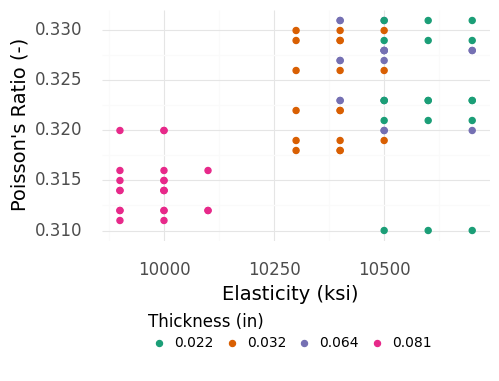

In [21]:
%%capture --no-display
print(p)

```{glue:figure} grama-vis-alloys
:name: fig-grama-vis-alloys

Material properties for aluminum plates of different thicknesses. Note that the thickest plates tend to be "separated" with lower `mu` and `E` values.
```

**{numref}`Figure %s <fig-grama-vis-alloys>`** implies that the material properties are *not* thickness-independent! However, if we dig into the context of the data further, we will find that the measurements of the thickest plates are suspicious.

```{warning} **Outliers.**
Based on **{numref}`Figure %s <fig-grama-vis-alloys>`**, the specimens of thickness `0.081` (in) are suspicious; these observations are well-separated from all the other cases. Reviewing the original publication that reported these data {cite}`stang1946`, it turns out that the thickest specimens were characterized with a different measurement procedure than the thinner specimens. This suggests that the measurements of the thickest specimens might not be compatible with the measurements of the thinnest specimens.
```

Let's filter out the thickest specimens (**{numref}`Figure %s <fig-grama-vis-alloys-filtered>`**) and see if the remaining observations are relatively consistent.


In [22]:
df_filtered = (
    df_stang
    # Keep only those plates thinner than 0.081 in
    >> gr.tf_filter(DF.thick < 0.081)
)

In [23]:
# Hidden input
p = (
    df_filtered
    >> gr.tf_mutate(thick=gr.as_str(DF.thick))
    >> gr.ggplot(gr.aes("E", "mu", color="thick"))
    + gr.geom_point(size=2)
    + gr.scale_color_brewer(name="Thickness (in)", type="qual", palette=2)
    + gr.theme_uqbook()
    + gr.labs(
        x="Elasticity (ksi)",
        y="Poisson's Ratio (-)",
    )
)

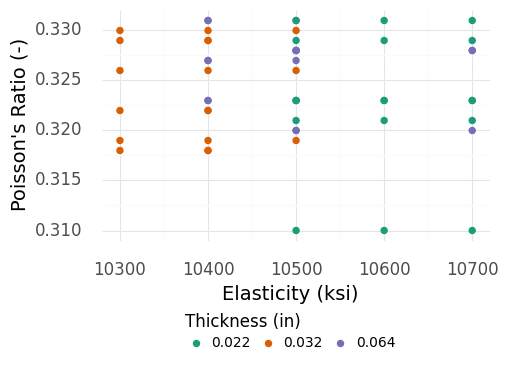

In [24]:
%%capture --no-display
print(p)

```{glue:figure} grama-vis-alloys-filtered
:name: fig-grama-vis-alloys-filtered

Material properties for aluminum plates of different thicknesses, with the thickest plates removed. Among the remaining plates, the observations seem to have a similar spread.
```

The remaining observations shown in **{numref}`Figure %s <fig-grama-vis-alloys-filtered>`** are fairly consistent, even across different thicknesses . Given what we know, we will move forward by ignoring the thickest specimen data and limiting our attention to the plates studied in the remaining data. This leaves us with plates roughly between 1/48" and 1/16" in thickness.

```{tip} **Talk to experts!**
If we were in the business of manufacturing plates, this would be an *excellent* time to go have a chat with the materials and process engineers about their experiments. We would ask about the two different characterization procedures, and ask for their opinion on how to use the data to inform our structural reliability analysis. We assumed the thickest specimens were less trustworthy, but their expert opinion might be different.
```


Now that we have a subset of data that we *trust*, we can proceed to build a probabilistic model for the uncertainty in material properties. As we'll see in {numref}`Section %s <02s-propagation-algorithms>`, we will need a model (rather than just data) to study the very small failure probabilities that we seek. The following code fits a joint distribution for `E, mu` based on the filtered data: A joint distribution is composed of **marginal distributions** ({numref}`Section %s <02s-marginals>`) and a **dependency structure** ({numref}`Section %s <02s-dependency>`). A marginal quantitatively describes the uncertainty in a single quantity, while dependency refers to how multiple uncertainties are related.


In [25]:
# Build an aluminum material property model
md_aluminum = (
    gr.Model("Plate aluminum material properties")
    # Add marginals for each uncertain input
    >> gr.cp_marginals(
        E=gr.marg_fit("lognorm", df_filtered.E),
        mu=gr.marg_fit("beta", df_filtered.mu),
    )
    # Add a copula to define the dependency
    >> gr.cp_copula_gaussian(df_data=df_filtered)
)
md_aluminum

model: Plate aluminum material properties

  inputs:
    var_det:

    var_rand:
      E: (+0) lognorm, {'mean': '1.398e+23', 's.d.': '3.662e+45', 'COV': 2.620351106053833e+22, 'skew.': 1.7991959366176194e+67, 'kurt.': 2.2226746565162602e+179}
      mu: (+0) beta, {'mean': '3.300e-01', 's.d.': '1.000e-02', 'COV': 0.02, 'skew.': -1.81, 'kurt.': 6.859999999999999}

    copula:
      Gaussian copula with correlations:
  var1 var2      corr
0   mu    E  0.103376

  functions:

```{tip} **A reasonable fit?**
We chose a couple of marginal distribution shapes above: lognormal for `E` and beta for `mu`. How well do these choices represent the original data?
```

To assess the model fit, we visualize the original experimental data against simulated realizations from our distribution model (**{numref}`Figure %s <fig-grama-vis-model1>`**).


In [26]:
# Hidden input
# Import tools to plot with scientific labels
from mizani.formatters import scientific_format

p = (
    md_aluminum
    ## Draw realizations from distribution
    >> gr.ev_sample(n=1e3, seed=101, df_det="nom", skip=True)
    >> gr.tf_mutate(source="Simulated")
    ## Add in the experimental data
    >> gr.tf_bind_rows(
        df_filtered
        >> gr.tf_mutate(source="Experimental")
    )
    ## Compare the synthetic and experimental data
    >> gr.ggplot(gr.aes("E", "mu", color="source"))
    + gr.geom_point()
    + gr.scale_x_continuous(
        breaks=[0, 1e14, 2e14],
        labels=scientific_format(digits=2),
    )
    + gr.scale_color_manual(
        values=dict(Experimental="red", Simulated="grey"),
        name="Data Source",
    )
    + gr.theme_uqbook()
    + gr.labs(x="Elasticity (ksi)", y="Poisson's Ratio (-)", title="Model V1")
)

eval_sample() is rounding n...
Estimated runtime: 0.0000 sec


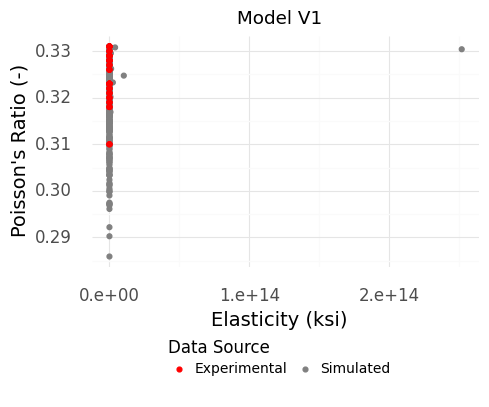

In [27]:
%%capture --no-display
print(p)

```{glue:figure} grama-vis-model1
:name: fig-grama-vis-model1

Simulated material property values from the first version of our model. There are extreme outliers in the simulated data that do not appear in the original data. Note that `e+14` means $\times 10^{14}$.
```

```{warning} **Extreme outliers in elasticity!**
The chosen shape for the elasticity `E` produces extreme outliers that do not appear in the original data (**{numref}`Figure %s <fig-grama-vis-model1>`**). We have no evidence to support such extreme tail behavior. Therefore, we should change the marginal for `E`.
```

Let's update the model to use a marginal shape for `E` with less extreme tail behavior. We then repeat the visual comparison to check our updated model:


In [28]:
md_aluminum_v2 = (
    gr.Model("Plate aluminum material properties")
    >> gr.cp_marginals(
        # Change the marginal for E to a normal
        E=gr.marg_fit("norm", df_filtered.E),
        mu=gr.marg_fit("beta", df_filtered.mu),
    )
    >> gr.cp_copula_gaussian(df_data=df_filtered)
)

In [29]:
# Hidden input and output
p = (
    md_aluminum_v2
    ## Draw realizations from distribution
    >> gr.ev_sample(n=1e3, seed=101, df_det="nom", skip=True)
    >> gr.tf_mutate(source="Simulated")
    ## Add in the experimental data
    >> gr.tf_bind_rows(
        df_filtered
        >> gr.tf_mutate(source="Experimental")
    )
    ## Compare the synthetic and experimental data
    >> gr.ggplot(gr.aes("E", "mu", color="source"))
    + gr.geom_point()
    + gr.scale_color_manual(
        values=dict(Experimental="red", Simulated="grey"),
        name="Data Source",
    )
    + gr.theme_uqbook()
    + gr.labs(x="Elasticity (ksi)", y="Poisson's Ratio (-)", title="Model V2")
)

eval_sample() is rounding n...
Estimated runtime: 0.0000 sec


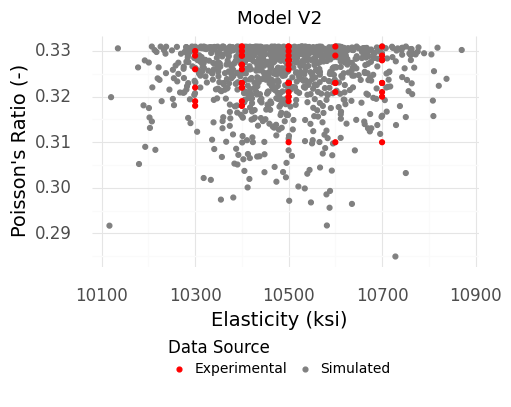

In [30]:
%%capture --no-display
print(p)

```{glue:figure} grama-vis-model2
:name: fig-grama-vis-model2

Simulated material property values from the second version of our model. This version does not produce the extreme outliers, which better matches the experimental data.
```

The results of **{numref}`Figure %s <fig-grama-vis-model2>`** look much more reasonable! The simulated and experimental data exhibit much more similar variability.

Now that we have a reasonable model for the material properties, we can turn our attention to mapping these inputs to the buckling behavior of the plate. Buckling is analyzed in terms of the *critical buckling stress* $\sigma$ of a particular part. The larger this stress, the greater capacity the part has to withstand a buckling load.

The critical buckling stress for a plate in compression (with free edges) is a classic result of structural mechanics {cite}`peery2011aircraft`, given by

$$\sigma_{\text{buckling}} = k_{cr} \frac{\pi^2 E}{12(1 - \mu^2)} \left(\frac{t}{h}\right)^2$$

with $k_{cr} = (\frac{mh}{w} + \frac{w}{mh})^2$, and symbols defined in the **{numref}`Table %s <tab-plate-var>`**.

```{table} Variables for the buckling plate model.
---
name: tab-plate-var
---
| **Symbol** | **Meaning** |
|--------|---------|
| $E$    | Aluminum elasticity |
| $\mu$  | Aluminum Poisson ratio |
| $t$    | Plate thickness |
| $h$    | Plate height |
| $w$    | Plate width |
| $m$    | Buckling wavenumber |
| $\sigma_{\text{buckling}}$ | Buckling stress |
```

```{tip} **Anticipate your sanity checks.**
Based on the buckling equation just given---and based on general physical intuition---we should have some expectations about the output's behavior with its inputs. For instance, we would expect the buckling stress to get larger with a larger thickness: A thicker plate is harder to buckle. Conversely, we would expect a longer plate to buckle more easily, leading to a smaller buckling stress.
```

We can implement this function and add it to our `py-grama` model. The following code does this:

In [31]:
# Build upon the material property model to add
# functions for the structural response
md_plate = (
    # Start with the material property model we developed
    md_aluminum_v2
    # Add the buckling strength equation
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            sigma_buckle
              =3.14159**2 * df.E
              / 12 / (1 - df.mu**2)
              * df.h**2 / df.t**2 # NB. Typo here!
              *(df.m*df.h/df.w + df.w/df.m/df.h)**2          
        ),
        var=["E", "mu", "t", "h", "w", "m"],
        out=["sigma_buckle"],
        name="Buckling strength",
    )
    # Add bounds for deterministic inputs
    >> gr.cp_bounds(
        h=(2, 6), # Consider a range
        w=(6, 6), # Assume constrained by design
        m=(1, 1), # Assume first mode dominates
        # Based on tested plate thicknesses
        t=(1/48, 1/16),
    )
)
md_plate

model: Plate aluminum material properties

  inputs:
    var_det:
      m: [1, 1]
      h: [2, 6]
      t: [0.020833333333333332, 0.0625]
      w: [6, 6]

    var_rand:
      E: (+0) norm, {'mean': '1.049e+04', 's.d.': '1.223e+02', 'COV': 0.01, 'skew.': 0.0, 'kurt.': 3.0}
      mu: (+0) beta, {'mean': '3.300e-01', 's.d.': '1.000e-02', 'COV': 0.02, 'skew.': -1.81, 'kurt.': 6.859999999999999}

    copula:
      Gaussian copula with correlations:
  var1 var2      corr
0   mu    E  0.030128

  functions:
      Buckling strength: ['E', 'mu', 't', 'h', 'w', 'm'] -> ['sigma_buckle']

When implementing a model it is a good idea to use sinews as a sanity check, as such a plot visualizes the effect of every input on every output of the model. The following code constructs a sinew plot of the plate model, with results shown in **{numref}`Figure %s <fig-grama-sinews-plate>`**:


In [32]:
p = (
    # Start with the plate model
    md_plate
    # Evaluate data for a sinew plot
    >> gr.ev_sinews(df_det="swp")
    # Construct the plot
    >> gr.pt_auto()
)

Calling plot_sinew_outputs....


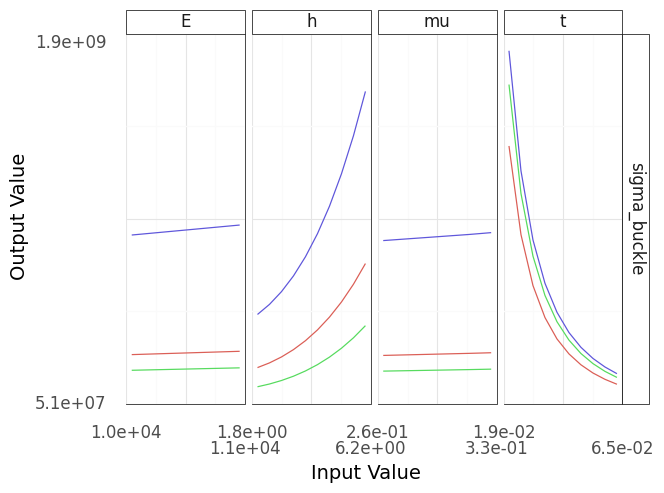

In [33]:
%%capture --no-display
print(p)

```{glue:figure} grama-sinews-plate
:name: fig-grama-sinews-plate

A sinew plot generated using the buckling plate model. Note that this model contains implementation errors, as described in the text!
```

```{warning} **These sinews indicate an incorrect model.**
This sinew plot in **{numref}`Figure %s <fig-grama-sinews-plate>`** doesn't match the intuition we stated above! As we increase the height `h` the plate becomes *harder* to buckle (the buckling stress increases), while when we make the plate thicker the plate becomes *easier* to buckle (buckling stress decreases). This is a *verification failure* that points to a potential mistake in the model implementation.
```

By sanity-checking the model with a sinew plot (**{numref}`Figure %s <fig-grama-sinews-plate>`**), we can see that the model has incorrect behavior. Reviewing the code above, it seems the $h$ and $t$ terms are swapped. We can fix that easily and rerun the sweeps:


In [34]:
# Fix the typo in the buckling strength equation
md_plate_v2 = (
    md_aluminum_v2
    # Add the buckling strength equation
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            sigma_buckle
              =3.14159**2 * df.E
              / 12 / (1 - df.mu**2)
              * df.t**2 / df.h**2 # NB. Corrected typo
              *(df.m*df.h/df.w + df.w/df.m/df.h)**2          
        ),
        var=["E", "mu", "t", "h", "w", "m"],
        out=["sigma_buckle"],
        name="Buckling strength",
    )
    # Add bounds for deterministic inputs
    >> gr.cp_bounds(
        h=(2, 6), # Consider a range
        w=(6, 6), # Assume constrained by design
        m=(1, 1), # Assume first mode dominates
        # Based on tested plate thicknesses
        t=(1/32, 1/16),
    )
)

In [35]:
# Hidden input
p = (
    md_plate_v2
    >> gr.ev_sinews(df_det="swp")
    >> gr.pt_auto()
)

Calling plot_sinew_outputs....


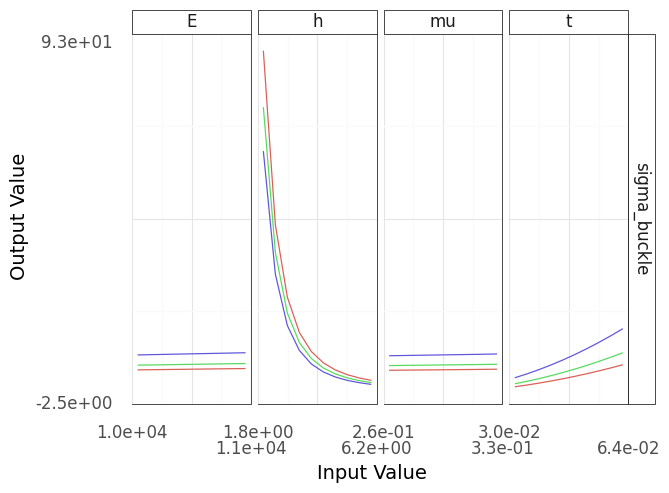

In [36]:
%%capture --no-display
print(p)

```{glue:figure} grama-sinews-plate-fixed
:name: fig-grama-sinews-plate-fixed

Sinew plot generated using the buckling plate model. This model is corrected from the version that produced **{numref}`Figure %s <fig-grama-sinews-plate>`**.
```

The updated model's results matche our intuition (**{numref}`Figure %s <fig-grama-sinews-plate-fixed>`**), and provides a quantitative comparison between the effects of the inputs. Note that the range of critical buckling values is quite small in the material property panels, while the ranges associated with the plate thickness and length are much wider. This implies that we can adjust the plate dimensions to achieve our desired safety goal, as the buckling behavior is much more sensitive to the plate geometry than material properties.

```{warning} **Goals for this case study (revised)**
Note that we had to specify bounds for the *height* of the plate to run the sweep. We didn't specify a plate height in our original goal. To correct this oversight, let's update our goal to specify plates $6$ inches in height.
```

Finally, to complete our modeling, we will incorporate the target load of $1$ ksi by defining a *limit state function* (see {numref}`Appendix %s <04s-limit-state>` for more details).

$$g_{\text{buckle}} = \sigma_{\text{buckle}} - \sigma_{\text{applied}},$$

with $\sigma_{\text{applied}} = 1$ ksi. The limit state function $g$ standardizes the interpretation of our quantitative failure model: Cases where $g > 0$ correspond to safe operation, while those with $g \leq 0$ correspond to failure.

In [37]:
# Build a model with the design context:
# the applied load of 1 ksi
md_buckling = (
    md_plate_v2
    # Add the limit state function
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            g_buckle=df.sigma_buckle - 1.0 # load in ksi
        ),
        var=["sigma_buckle"],
        out=["g_buckle"],
        name="Limit state",
    )
)
md_buckling

model: Plate aluminum material properties

  inputs:
    var_det:
      m: [1, 1]
      h: [2, 6]
      t: [0.03125, 0.0625]
      w: [6, 6]

    var_rand:
      E: (+0) norm, {'mean': '1.049e+04', 's.d.': '1.223e+02', 'COV': 0.01, 'skew.': 0.0, 'kurt.': 3.0}
      mu: (+0) beta, {'mean': '3.300e-01', 's.d.': '1.000e-02', 'COV': 0.02, 'skew.': -1.81, 'kurt.': 6.859999999999999}

    copula:
      Gaussian copula with correlations:
  var1 var2      corr
0   mu    E  0.030128

  functions:
      Buckling strength: ['E', 'mu', 't', 'h', 'w', 'm'] -> ['sigma_buckle']
      Limit state: ['sigma_buckle'] -> ['g_buckle']

Now we have a complete model with which to conduct our analysis.


### Analyzing the model

We are interested in determining a plate thickness that produces a chance of failure less than 1 in 100. To estimate the probability of failure (POF), we will use a Monte Carlo simulation technique with the probabilistic model we just constructed (see {numref}`Section %s <02s-propagation-algorithms>` for more details).

```{tip} **Conversations with a Model: The Monte Carlo Method.**
Zach. "What would Stan Ulam say about the Monte Carlo method?"

Bot. "I developed the Monte Carlo method while working on problems in the field of nuclear physics, but I soon realized that it could be applied to a wide range of other fields as well, including finance, engineering and computer science. By using random sampling techniques, the method is particularly useful for solving problems that involve a large number of variables and that are too complex to solve analytically. 

The Monte Carlo method is named after the city of Monte Carlo in Monaco, which is famous for its casinos. The name is fitting because the method involves a large number of random trials, similar to the rolling of dice in a casino game. With each trial, we gain a better understanding of the system and can estimate the probability of different outcomes."
```

To start, we will analyze a plate with a thickness of $1/48$", the lower end of sizes considered in our dataset:


In [38]:
(
    ## Perform a monte carlo analysis
    # Select a model with uncertainty
    md_buckling
    # Generate a random sample
    >> gr.ev_sample(
        n=1e2,    # Sample size
        seed=101, # For reproducibility
        # Define the deterministic input values
        df_det=gr.df_make(h=6, w=6, t=1/48, m=1),
    )
    # Estimate the probability of failure (POF)
    # Include confidence interval endpoints: lo|up
    >> gr.tf_summarize(
        pof_lo=gr.pr_lo(DF.g_buckle <= 0),
        pof_est=gr.pr(DF.g_buckle <= 0),
        pof_up=gr.pr_up(DF.g_buckle <= 0),
    )
    # Round all numeric columns
    >> gr.tf_mutate_if(
        gr.is_numeric,
        lambda x: gr.round(x, 2),
    )
)

eval_sample() is rounding n...


,pof_lo,pof_est,pof_up
0,0.93,1.0,1.0


Clearly, the POF is much higher than our desired $0.01$! Let's try the other end of the thickness bounds with $1/16$":


In [39]:
(
    # Study the buckling model
    md_buckling
    # Perform simple Monte Carlo
    >> gr.ev_sample(
        n=1e2,
        seed=101,
        df_det=gr.df_make(h=6, w=6, t=1/16, m=1)
    )
    >> gr.tf_summarize(
        pof_lo=gr.pr_lo(DF.g_buckle <= 0),
        pof_est=gr.pr(DF.g_buckle <= 0),
        pof_up=gr.pr_up(DF.g_buckle <= 0),
    )
    # Round all numeric columns
    >> gr.tf_mutate_if(
        gr.is_numeric,
        lambda x: gr.round(x, 2),
    )
)

eval_sample() is rounding n...


,pof_lo,pof_est,pof_up
0,0.0,0.0,0.07


The estimated POF (`pof_est`) is zero! That certainly satisfies our goal of `pof < 0.01`, but it seems fishy....

```{warning} **Calculation tolerances.**
The Monte Carlo approach gives us an estimate for our target quantity, but also a **confidence interval** (CI). A CI gives us a possible range in which true value may land, which requires careful interpretation of results. The CI we see here violates our constraint (`pof_up > 0.01`), which indicates that our simulation needs more refinement---a larger sample size---to provide a more trustworthy answer.
```

We can refine our simulation by increasing the sample size `n` in our Monte Carlo evaluation. A rough rule of thumb when estimating low-probability events is to use a sample size of $n = 20 / p$, where $p$ is our best guess for the small probability. Because we're targeting a failure rate of 1 in 100, we'll set $p = 0.01$ and apply the heuristic.


In [40]:
(
    # Study the buckling model
    md_buckling
    # Perform simple Monte Carlo
    >> gr.ev_sample(
        # Use the rule of thumb for sample size
        n=20 / 0.01, 
        seed=101,
        df_det=gr.df_make(h=6, w=6, t=1/16, m=1)
    )
    >> gr.tf_summarize(
        pof_lo=gr.pr_lo(DF.g_buckle <= 0),
        pof_est=gr.pr(DF.g_buckle <= 0),
        pof_up=gr.pr_up(DF.g_buckle <= 0),
    )
    # Round all numeric columns
    >> gr.tf_mutate_if(
        gr.is_numeric,
        lambda x: gr.round(x, 3),
    )
)

eval_sample() is rounding n...


,pof_lo,pof_est,pof_up
0,0.0,0.0,0.004


The POF estimate is still zero, but the upper confidence interval end (`pof_up`) is now below our target of $0.01$. This is a success! We have refined our results and found a thickness that confidently satisfies our POF constraint. This achieves our goal and finishes the case study. 

```{admonition} **Exercise: Minimize the thickness.**
Using the code just given, try to find the minimum thickness `t` that still satisfies the POF constraint `pof_up <= 0.01`.
```


## A general process

The brief case study given in {numref}`Chapter %s <02-grama-brief>` suggests an iterative process you can use to approach model analysis under uncertainty. {numref}`Chapter %s <01-modeling-process>` details a full *modeling process*, but in brief, you should:

- Define the **goals** for your study. Use these goals to focus your work, but remain open to adjusting your goals if necessary.
  - This might include making your goal more specific, as we did with specifying a plate length.
- Iteratively **build** a model for your study. This includes specifying the functions, the inputs, and a description of the inputs with bounds or a joint density.
  - The ideal approach is to use representative data to inform your model. We used a dataset of measured aluminum properties.
  - If data are not available, consulting literature is an acceptable way to build your model. We used a classic reference to arrive at the buckling function.
  - You will likely discover surprises along the way, as we saw with the thickest plate specimens. These may necessitate follow-up studies or reasonable assumptions.
- Iteratively **analyze** your model to provide trustworthy results that support your goal.
  - You will likely have to iterate on your methods to arrive at trustworthy results, as we saw with refining the Monte Carlo simulation.

Throughout the whole process, use the dual modes of curiosity and skepticism to guide your process.
